In [1]:
import pandas as pd
import datetime
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
! pip install plotly
 
%matplotlib inline

In [2]:
from google.colab import files
 
uploaded = files.upload()
import io
df = pd.read_excel(io.BytesIO(uploaded['75c69636-7dc2-4da8-a9bf-71641777c7ed.xls']))

Saving 75c69636-7dc2-4da8-a9bf-71641777c7ed.xls to 75c69636-7dc2-4da8-a9bf-71641777c7ed.xls


In [3]:
from datetime import date
today = date.today().month
print(today)

5


In [4]:
#df['year'] =  df['birth_dt'].dt.year
now = pd.Timestamp('now')
df['age'] = (now - df['birth_dt']).astype('<m8[Y]')
df.sort_values(['birth_dt']).head()

,client_id,birth_dt,reg_dttm,purchase_id,purchase_dt,purchase_amt,age
262,822110,1946-02-08,2019-01-18 10:26:59,NaN,NaT,NaN,75.0
906,825475,1951-02-24,2019-02-07 12:38:56,1.270656e+09,2019-03-21,2500.0,70.0
115,821281,1952-08-09,2019-01-12 21:09:59,1.281542e+09,2019-03-28,4500.0,68.0
116,821281,1952-08-09,2019-01-12 21:09:59,1.292952e+09,2019-04-03,4500.0,68.0
817,825085,1953-03-28,2019-02-05 11:43:17,1.242408e+09,2019-03-05,2500.0,68.0


In [5]:
p = (df[df['purchase_id'].where(df['age']==20).notnull()==True]['purchase_id'].count())/(df['client_id'].where(df['age']==20).count())
print (p)

0.5808383233532934


In [6]:
def f1(df):
   return 100*(df[df['purchase_id'].notnull()==True]['purchase_id'].count())/(df['client_id'].count())

In [8]:
d1 = df.groupby(['age']).apply(f1).to_frame(name='Conv').reset_index()
d1.head()

,age,Conv
0,20.0,58.083832
1,21.0,63.076923
2,22.0,52.631579
3,23.0,51.851852
4,24.0,54.166667


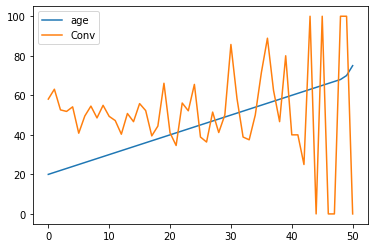

In [9]:
d1.plot()

In [10]:

#px.bar( d1, x='age', y='Conv', title = "Конверсия в утилизацию по возрастам")
fig = go.Figure()
fig.add_trace(go.Bar(x = d1['age'], y=d1['Conv']))
fig.update_layout( title="Конверсия в утилизацию, %",
                 xaxis_title="Возраст")
fig.show()

In [ ]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
! pip install plotly

AttributeError: ignored